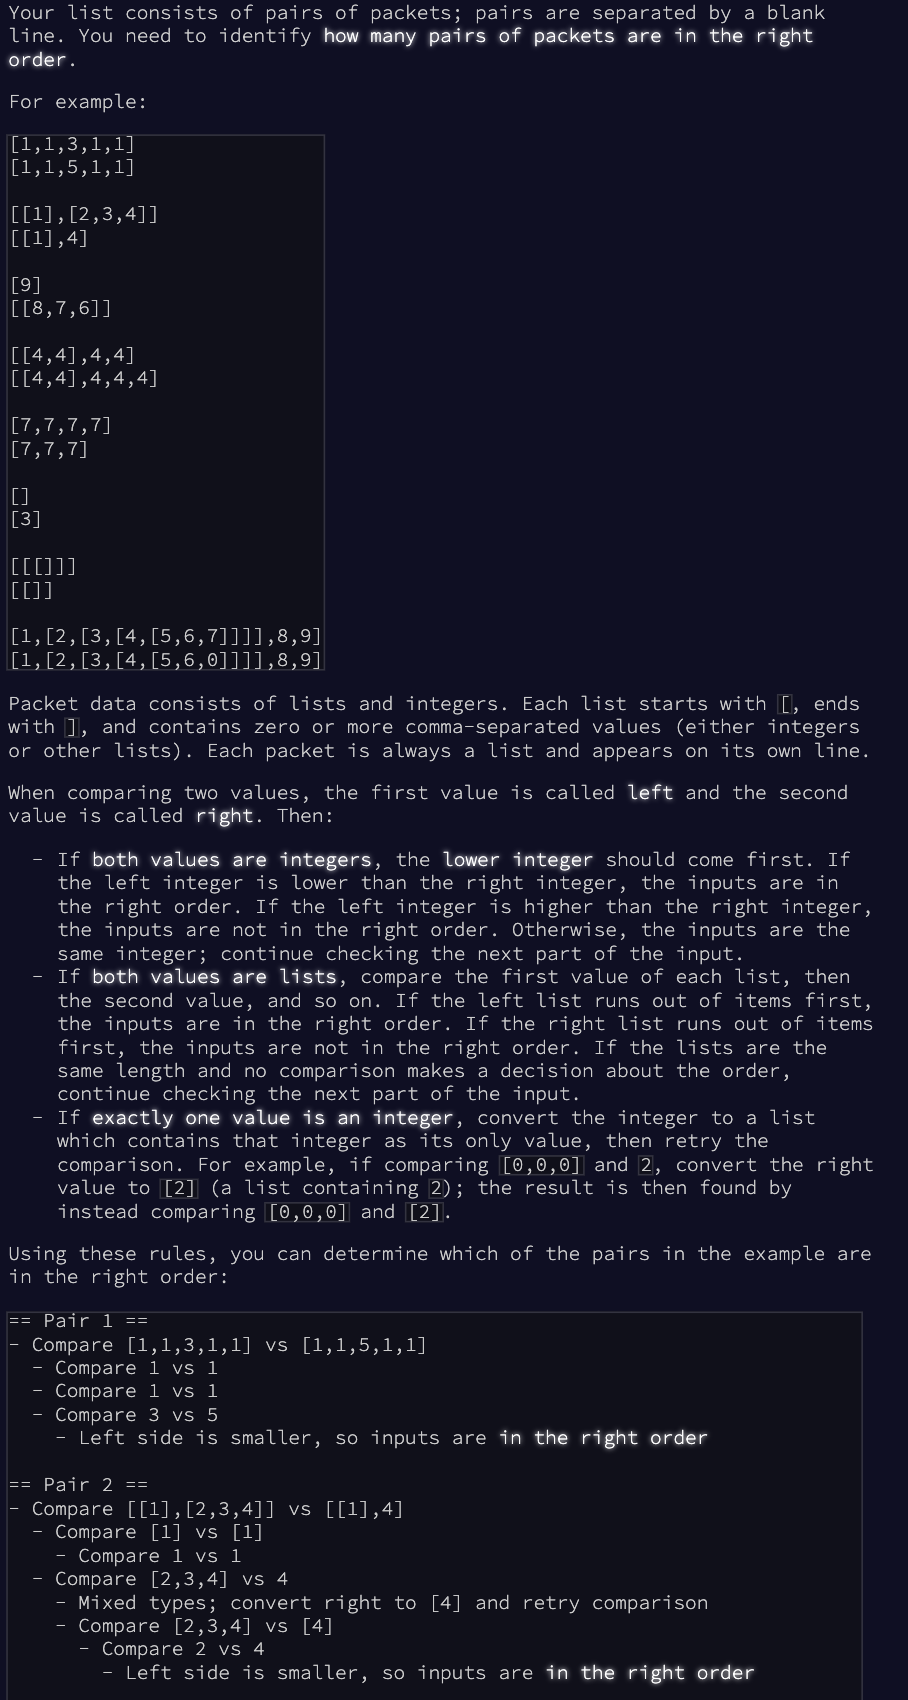

In [1]:
from IPython import display
display.Image("day13part1instructionsA.jpeg") 

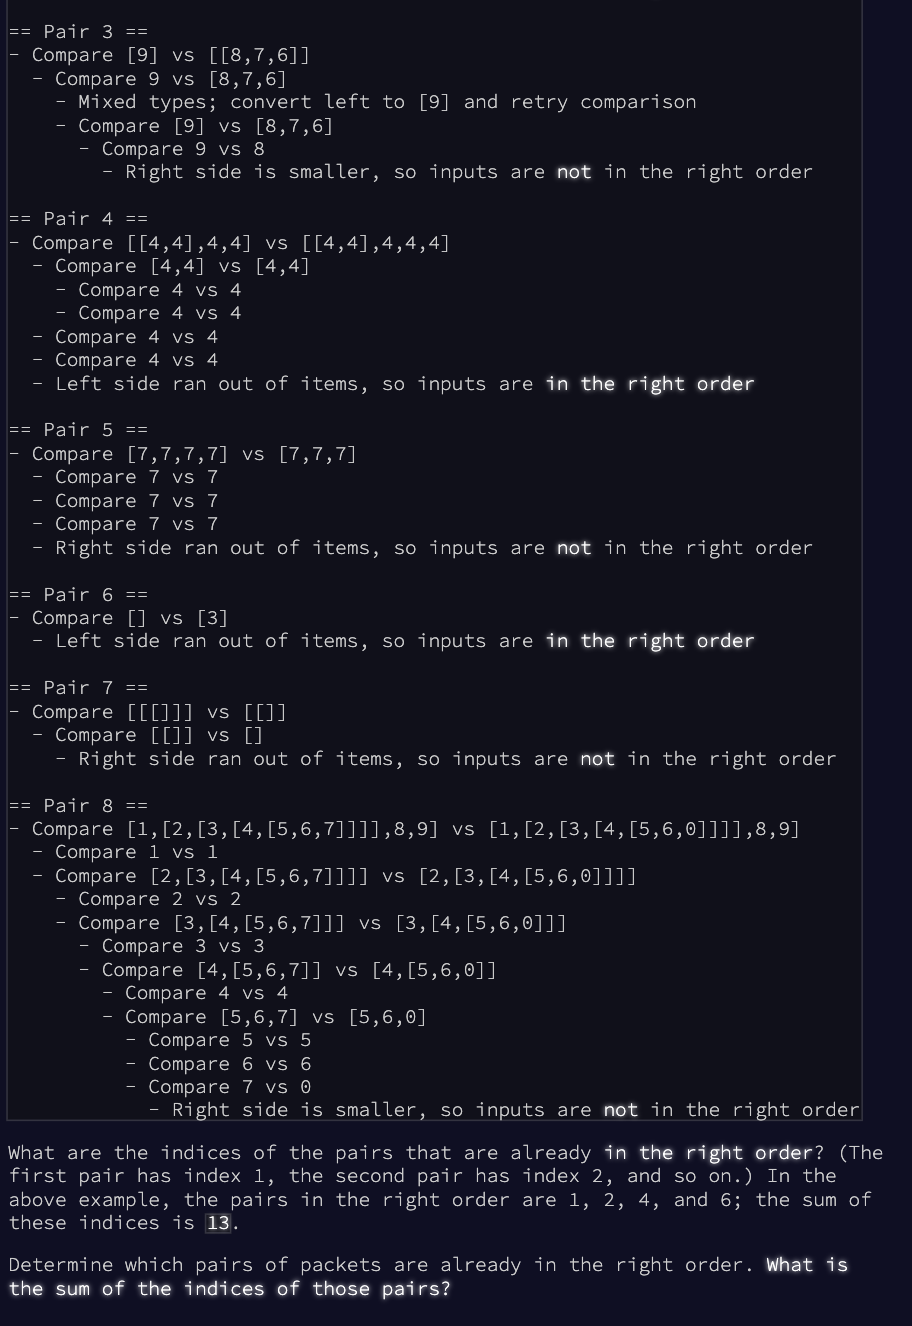

In [2]:
display.Image("day13part1instructionsB.jpeg")

# testing on example input

### example input pairs

In [3]:
l = [1,1,3,1,1]
r = [1,1,5,1,1]
pair_1 = [l,r]

l = [[1],[2,3,4]]
r = [[1],4]
pair_2 = [l,r]

l = [9]
r = [[8,7,6]]
pair_3 = [l,r]

l = [[4,4],4,4]
r = [[4,4],4,4,4]
pair_4 = [l,r]

l = [7,7,7,7]
r = [7,7,7]
pair_5 = [l,r]

l = []
r = [3]
pair_6 = [l,r]

l = [[[]]]
r = [[]]
pair_7 = [l,r]

l = [1,[2,[3,[4,[5,6,7]]]],8,9]
r = [1,[2,[3,[4,[5,6,0]]]],8,9]
pair_8 = [l,r]

### pair comparer function

In [4]:
from itertools import zip_longest as zip_long

In [5]:
# implementing function with comparision rules to check if pairs in correct order

def packet_check(pair):
    print(f'PACKET {pair[0]} VS. PACKET {pair[1]}')
    print()
    compare_list = [] # True/False values of each 'int vs int' check or 'list length check' for the pair 
    
    def inner_check(pair):
        
        l = pair[0]
        r = pair[1]
        
        for li, ri in zip_long(l,r):
            # loop through items in left and right packet of the pair
            print(f'comparing {li} and {ri}:')
            if type(li) == int and type(ri) == int:
                # if both ints, checking which is smaller
                print('   int vs int')
                if li < ri:
                    print('   int left smaller, inputs in right order √')
                    print('   check complete')
                    compare_list.append(True)
                    return True
                elif li > ri:
                    print('   int right smaller, inputs in wrong order ✘')
                    print('   check complete')
                    compare_list.append(False)
                    return False
                # if both the same, continue with check
                elif li == ri:
                    print('   left == right, continue')
                    print()
            # checking if one list longer than the other
            elif li == None:
                print('   left list ran out of items first, inputs in right order √')
                print('   check complete')
                compare_list.append(True)
                return True
            elif ri == None:
                print('   right list ran out of items first, inputs in wrong order ✘')
                print('   check complete')
                print
                compare_list.append(False)
                return False
            # if both lists, comparing inside the lists (recursive call)
            elif type(li) == list and type(ri) == list:
                print('   list vs list')
                print('   checking lists')
                inner_pair = (li,ri)
                inner_check(inner_pair)
            # if one int and the other list, converting int to list and comparing inside the lists (recursive call)
            elif type(li) == int and type(ri) == list:
                print('   int vs list')
                print('   converting int to list and checking lists')
                li_to_list = []
                li_to_list.append(li)
                inner_pair = (li_to_list,ri)
                inner_check(inner_pair)
            elif type(li) == list and type(ri) == int:
                print('   int vs list')
                print('   converting list to int and checking lists')
                ri_to_list = []
                ri_to_list.append(ri)
                inner_pair = (li,ri_to_list)
                inner_check(inner_pair)
    inner_check(pair)
            
    print(compare_list)
    if compare_list[0] == True: # if the first value in the compare list is true, the pair in the correct order
                                # if the first value in the compare list is false, the pair in the wrong order
                                # first check to return 'correct order'/'wrong order' completes comparision
                                # any additonal results just the recursion finishing,
                                # but these additional results don't matter
        return True
    else:
        return False

In [6]:
packet_check(pair_1)
print()
print('______________________________________')
print()
packet_check(pair_2)
print()
print('______________________________________')
print()
packet_check(pair_3)
print()
print('______________________________________')
print()
packet_check(pair_4)
print()
print('______________________________________')
print()
packet_check(pair_5)
print()
print('______________________________________')
print()
packet_check(pair_6)
print()
print('______________________________________')
print()
packet_check(pair_7)
print()
print('______________________________________')
print()
packet_check(pair_8)

PACKET [1, 1, 3, 1, 1] VS. PACKET [1, 1, 5, 1, 1]

comparing 1 and 1:
   int vs int
   left == right, continue

comparing 1 and 1:
   int vs int
   left == right, continue

comparing 3 and 5:
   int vs int
   int left smaller, inputs in right order √
   check complete
[True]

______________________________________

PACKET [[1], [2, 3, 4]] VS. PACKET [[1], 4]

comparing [1] and [1]:
   list vs list
   checking lists
comparing 1 and 1:
   int vs int
   left == right, continue

comparing [2, 3, 4] and 4:
   int vs list
   converting list to int and checking lists
comparing 2 and 4:
   int vs int
   int left smaller, inputs in right order √
   check complete
[True]

______________________________________

PACKET [9] VS. PACKET [[8, 7, 6]]

comparing 9 and [8, 7, 6]:
   int vs list
   converting int to list and checking lists
comparing 9 and 8:
   int vs int
   int right smaller, inputs in wrong order ✘
   check complete
[False]

______________________________________

PACKET [[4, 4], 4, 4]

False

### comparer function index tracker

In [7]:
# # same function as above without printing

def packet_check(pair):
    compare_list = [] # True/False values of each 'int vs int' check or 'list length check' for the pair 
    
    def inner_check(pair):
        
        l = pair[0]
        r = pair[1]
        
        for li, ri in zip_long(l,r):
            # loop through items in left and right packet of the pair
            if type(li) == int and type(ri) == int:
                # if both ints, checking which is smaller
                if li < ri:
                    compare_list.append(True)
                    return True
                elif li > ri:
                    compare_list.append(False)
                    return False
                # if both the same, continue with check
                elif li == ri:
                    pass
            # checking if one list longer than the other
            elif li == None:
                compare_list.append(True)
                return True
            elif ri == None:
                compare_list.append(False)
                return False
            # if both lists, comparing inside the lists (recursive call)
            elif type(li) == list and type(ri) == list:
                inner_pair = (li,ri)
                inner_check(inner_pair)
            # if one int and the other list, converting int to list and comparing inside the lists (recursive call)
            elif type(li) == int and type(ri) == list:
                li_to_list = []
                li_to_list.append(li)
                inner_pair = (li_to_list,ri)
                inner_check(inner_pair)
            elif type(li) == list and type(ri) == int:
                ri_to_list = []
                ri_to_list.append(ri)
                inner_pair = (li,ri_to_list)
                inner_check(inner_pair)
    inner_check(pair)
            
    if compare_list[0] == True: # if the first value in the compare list is true, the pair in the correct order
                                # if the first value in the compare list is false, the pair in the wrong order
                                # first check to return 'correct order'/'wrong order' completes comparision
                                # any additonal results just the recursion finishing,
                                # but these additional results don't matter
        return True
    else:
        return False

In [8]:
# putting all the example pairs in one list to iterate through

all_pairs = [pair_1,pair_2,pair_3,pair_4,pair_5,pair_6,pair_7,pair_8]
all_pairs

[[[1, 1, 3, 1, 1], [1, 1, 5, 1, 1]],
 [[[1], [2, 3, 4]], [[1], 4]],
 [[9], [[8, 7, 6]]],
 [[[4, 4], 4, 4], [[4, 4], 4, 4, 4]],
 [[7, 7, 7, 7], [7, 7, 7]],
 [[], [3]],
 [[[[]]], [[]]],
 [[1, [2, [3, [4, [5, 6, 7]]]], 8, 9], [1, [2, [3, [4, [5, 6, 0]]]], 8, 9]]]

In [9]:
correct_pairs = []
count = 0

# looping through list of example pairs,
# checking if each pair is in correct order or not,
# adding index of correct-ordered pairs to correct_pairs list (indexes start as 1)

for pair in all_pairs:
    count+=1
    print(f'checking pair {count}')
    if packet_check(pair) == True:
        correct_pairs.append(count)
        
correct_pairs

checking pair 1
checking pair 2
checking pair 3
checking pair 4
checking pair 5
checking pair 6
checking pair 7
checking pair 8


[1, 2, 4, 6]

In [10]:
# summing indices of correct pairs 

correct_pairs_sum = sum(correct_pairs)
correct_pairs_sum

13

# Solving On Real Input

In [11]:
with open('day13input.txt') as day13input:
    raw_input = day13input.read()

In [12]:
input_list = raw_input.splitlines()
input_list[:12]

['[[[1,[1,6,0,10,10],[],5,[]],[3,[5,8],2,[3,6,5,7],8],4,[0,[10]],8],[7,7],[[3,[9,5,10],[3],8,10],2,3,9],[[8,[3,1,4,9,5]]],[[[],0],10,10,3]]',
 '[[],[[[2,1,2,9],[]],[[1,5,10],3]]]',
 '',
 '[[],[[1,[0,4,7,10,10],3,[6,2,0],[9,1,4]],[],[5,[0,8,5],0,10,[3,10,10]],2,2],[],[[[],10,[]],[3,3,[0,0,2,10],[7,8,6,4,6],6],[10,[8,2,4,2,0]]],[[[9,2,10],[5],1,5,[2,7,9]],[4,[6]],[[]],[4,[],[6,5]]]]',
 '[[6,[]],[[[1],[6,4,1,4],3],[4,4]],[[6,[2,2,9],5,[8,9,7,10]],6],[5,[[10,9,0,5,5],[10,6,6]],[[10,9,6],[0,0,3,1],[],5],7]]',
 '',
 '[[[4,[3,0,5,8,4],[5],7]],[[1,[3,9,10,3],6],7,2]]',
 '[[[]],[],[[[5,7,8,8],[3,1,6,3],[6,7],4],10,8,[5,7,[5,0],9,7],6],[7,[4],7,[8,5],5]]',
 '',
 '[[[],4,6],[0,3,2],[[5,[9,0,10,3,7]],[[5,6,7],[6,0]],9,[9]]]',
 '[[[[7,8,9,3,5],6,[2,6],[6,1,4,10,8]],3],[10],[[]]]',
 '']

In [13]:
# removing spaces between each pair

no_spaces_list = [item for item in input_list if item != '']
no_spaces_list[:8]

['[[[1,[1,6,0,10,10],[],5,[]],[3,[5,8],2,[3,6,5,7],8],4,[0,[10]],8],[7,7],[[3,[9,5,10],[3],8,10],2,3,9],[[8,[3,1,4,9,5]]],[[[],0],10,10,3]]',
 '[[],[[[2,1,2,9],[]],[[1,5,10],3]]]',
 '[[],[[1,[0,4,7,10,10],3,[6,2,0],[9,1,4]],[],[5,[0,8,5],0,10,[3,10,10]],2,2],[],[[[],10,[]],[3,3,[0,0,2,10],[7,8,6,4,6],6],[10,[8,2,4,2,0]]],[[[9,2,10],[5],1,5,[2,7,9]],[4,[6]],[[]],[4,[],[6,5]]]]',
 '[[6,[]],[[[1],[6,4,1,4],3],[4,4]],[[6,[2,2,9],5,[8,9,7,10]],6],[5,[[10,9,0,5,5],[10,6,6]],[[10,9,6],[0,0,3,1],[],5],7]]',
 '[[[4,[3,0,5,8,4],[5],7]],[[1,[3,9,10,3],6],7,2]]',
 '[[[]],[],[[[5,7,8,8],[3,1,6,3],[6,7],4],10,8,[5,7,[5,0],9,7],6],[7,[4],7,[8,5],5]]',
 '[[[],4,6],[0,3,2],[[5,[9,0,10,3,7]],[[5,6,7],[6,0]],9,[9]]]',
 '[[[[7,8,9,3,5],6,[2,6],[6,1,4,10,8]],3],[10],[[]]]']

In [14]:
# grouping each pair into its own list of two items

pair_list = [no_spaces_list[n:n+2] for n in range(0, len(no_spaces_list), 2)]
pair_list[:4]

[['[[[1,[1,6,0,10,10],[],5,[]],[3,[5,8],2,[3,6,5,7],8],4,[0,[10]],8],[7,7],[[3,[9,5,10],[3],8,10],2,3,9],[[8,[3,1,4,9,5]]],[[[],0],10,10,3]]',
  '[[],[[[2,1,2,9],[]],[[1,5,10],3]]]'],
 ['[[],[[1,[0,4,7,10,10],3,[6,2,0],[9,1,4]],[],[5,[0,8,5],0,10,[3,10,10]],2,2],[],[[[],10,[]],[3,3,[0,0,2,10],[7,8,6,4,6],6],[10,[8,2,4,2,0]]],[[[9,2,10],[5],1,5,[2,7,9]],[4,[6]],[[]],[4,[],[6,5]]]]',
  '[[6,[]],[[[1],[6,4,1,4],3],[4,4]],[[6,[2,2,9],5,[8,9,7,10]],6],[5,[[10,9,0,5,5],[10,6,6]],[[10,9,6],[0,0,3,1],[],5],7]]'],
 ['[[[4,[3,0,5,8,4],[5],7]],[[1,[3,9,10,3],6],7,2]]',
  '[[[]],[],[[[5,7,8,8],[3,1,6,3],[6,7],4],10,8,[5,7,[5,0],9,7],6],[7,[4],7,[8,5],5]]'],
 ['[[[],4,6],[0,3,2],[[5,[9,0,10,3,7]],[[5,6,7],[6,0]],9,[9]]]',
  '[[[[7,8,9,3,5],6,[2,6],[6,1,4,10,8]],3],[10],[[]]]']]

In [15]:
# pulling out left packet from each pair

left_pairs = [pair[0] for pair in pair_list]
left_pairs[:4]

['[[[1,[1,6,0,10,10],[],5,[]],[3,[5,8],2,[3,6,5,7],8],4,[0,[10]],8],[7,7],[[3,[9,5,10],[3],8,10],2,3,9],[[8,[3,1,4,9,5]]],[[[],0],10,10,3]]',
 '[[],[[1,[0,4,7,10,10],3,[6,2,0],[9,1,4]],[],[5,[0,8,5],0,10,[3,10,10]],2,2],[],[[[],10,[]],[3,3,[0,0,2,10],[7,8,6,4,6],6],[10,[8,2,4,2,0]]],[[[9,2,10],[5],1,5,[2,7,9]],[4,[6]],[[]],[4,[],[6,5]]]]',
 '[[[4,[3,0,5,8,4],[5],7]],[[1,[3,9,10,3],6],7,2]]',
 '[[[],4,6],[0,3,2],[[5,[9,0,10,3,7]],[[5,6,7],[6,0]],9,[9]]]']

In [16]:
# pulling out right packet from each pair

right_pairs = [pair[1] for pair in pair_list]
right_pairs[:4]

['[[],[[[2,1,2,9],[]],[[1,5,10],3]]]',
 '[[6,[]],[[[1],[6,4,1,4],3],[4,4]],[[6,[2,2,9],5,[8,9,7,10]],6],[5,[[10,9,0,5,5],[10,6,6]],[[10,9,6],[0,0,3,1],[],5],7]]',
 '[[[]],[],[[[5,7,8,8],[3,1,6,3],[6,7],4],10,8,[5,7,[5,0],9,7],6],[7,[4],7,[8,5],5]]',
 '[[[[7,8,9,3,5],6,[2,6],[6,1,4,10,8]],3],[10],[[]]]']

In [17]:
import ast

In [18]:
# converting left packets from string to list

left_pair_lists = [ast.literal_eval(_list) for _list in left_pairs]
left_pair_lists[0]

[[[1, [1, 6, 0, 10, 10], [], 5, []],
  [3, [5, 8], 2, [3, 6, 5, 7], 8],
  4,
  [0, [10]],
  8],
 [7, 7],
 [[3, [9, 5, 10], [3], 8, 10], 2, 3, 9],
 [[8, [3, 1, 4, 9, 5]]],
 [[[], 0], 10, 10, 3]]

In [19]:
# converting right packets from string to list

right_pair_lists = [ast.literal_eval(_list) for _list in right_pairs]
right_pair_lists[0]

[[], [[[2, 1, 2, 9], []], [[1, 5, 10], 3]]]

In [20]:
# looping through zipped example pairs,
# checking if each pair is in correct order or not,
# adding index of right-ordered pairs to correct_pairs list (indexes start as 1)

correct_pairs = []
count = 0

for l,r in zip(left_pair_lists,right_pair_lists):
    count += 1
    pair = [l,r]
    if packet_check(pair) == True:
        correct_pairs.append(count)
    
print(correct_pairs)

[2, 4, 8, 12, 13, 14, 19, 20, 22, 23, 27, 28, 33, 34, 36, 39, 40, 44, 45, 46, 47, 49, 50, 59, 60, 61, 63, 65, 66, 71, 72, 73, 74, 75, 77, 78, 79, 80, 84, 86, 90, 91, 92, 95, 96, 97, 100, 101, 102, 104, 105, 106, 109, 112, 116, 118, 119, 121, 123, 125, 127, 128, 129, 130, 131, 133, 134, 136, 139, 141, 142, 143, 144, 148]


In [21]:
# summing indices of correct pairs 

correct_pairs_sum = sum(correct_pairs)
correct_pairs_sum

5905

**correct!**